## Configuring PTRS
This notebook shows different PTRS configurations

In [1]:
import numpy as np
import scipy.io

from neoradium import Carrier, PDSCH, Grid


In [2]:
carrier = Carrier(numRbs=5, spacing=30)  # 5*12*30000 = 1,800,000 Hz
carrier.print()


Carrier Properties:
  Cell Id:               1
  Bandwidth Parts:       1
  Active Bandwidth Part: 0
  Bandwidth Part 0:
    Resource Blocks:    5 RBs starting at 0 (60 subcarriers)
    Subcarrier Spacing: 30 KHz
    CP Type:            normal
    bandwidth:          1.8 MHz
    symbolsPerSlot:     14
    slotsPerSubFrame:   2
    nFFT:               1024
    frameNo:            0
    slotNo:             0



In [3]:
# Create a 2-layer PDSCH with Mapping Type A (default) using All Symbols and PRBs in the BWP (default)
pdsch = PDSCH(carrier.curBwp, numLayers=2)
pdsch.setDMRS()   # Default DMRS settings
pdsch.setPTRS()   # Default PTRS settings
pdsch.print()


PDSCH Properties:
  mappingType: A
  nID: 1
  rnti: 1
  numLayers: 2
  numCodewords: 1
  modulation: 16QAM
  portSet: [0, 1]
  symSet:   0   1   2   3   4   5   6   7   8   9  10  11  12  13
  prbSet:   0   1   2   3   4
  interleavingBundleSize: 0
  PRG Size: Wideband
  Bandwidth Part:
    Resource Blocks:    5 RBs starting at 0 (60 subcarriers)
    Subcarrier Spacing: 30 KHz
    CP Type:            normal
    bandwidth:          1.8 MHz
    symbolsPerSlot:     14
    slotsPerSubFrame:   2
    nFFT:               1024
    frameNo:            0
    slotNo:             0
  DMRS:
    configType: 1
    nIDs: []
    scID: 0
    sameSeq: 1
    symbols: Single
    typeA1stPos: 2
    additionalPos: 0
    cdmGroups: [0, 0]
    deltaShifts: [0, 0]
    allCdmGroups: [0]
    symSet: [2]
    REs (before shift): [0, 2, 4, 6, 8, 10]
    epreRatioDb: 0 (db)
    PTRS:
      timeDensity: 1
      freqDensity: 2
      reOffset: 0
      portSet: [0]
      epreRatio: 0
      symSet: [0, 1, 3, 4, 5, 6, 7, 

In [4]:
# Get a resourse grid from the PDSCH object. This creates a Grid object and populates it with the DMRS values
grid = pdsch.getGrid()
grid.getStats() # Print some statistics about the grid

{'GridSize': 1680, 'UNASSIGNED': 1581, 'DMRS': 60, 'PTRS': 39}

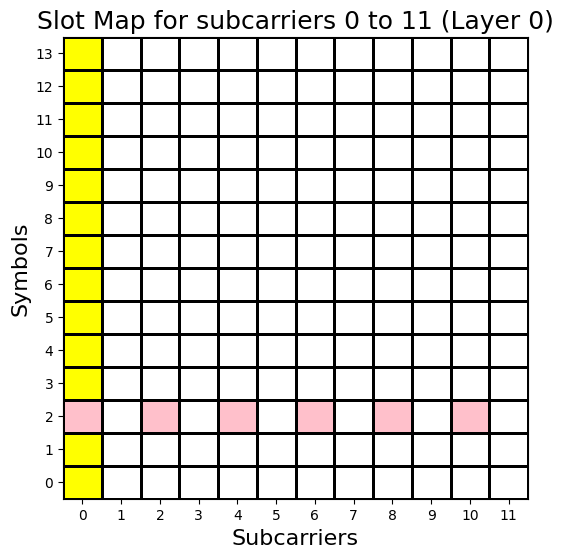

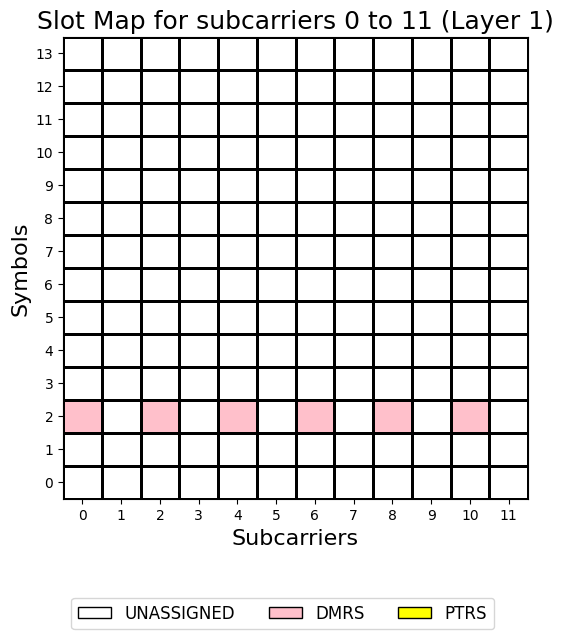

In [5]:
# Draw grid map for all layers, one slot and one PRB (reRange=(0,12))
grid.drawMap(pdsch.portSet, reRange=(0,12))

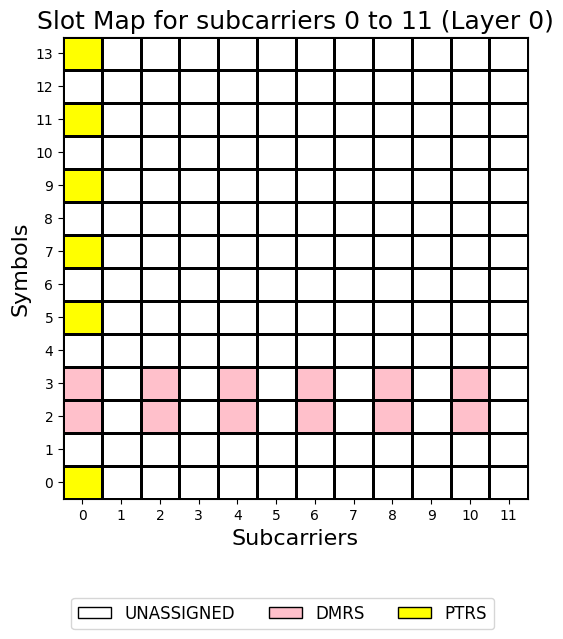

In [6]:
# Lets see an example of DMRS with double symbol (symbols=2) with PTRS timeDensity of 2 which
# means PTRS values at every other OFDM symbol. (Drawing only for one layer)
pdsch.setDMRS(symbols=2)
pdsch.setPTRS(timeDensity=2)
pdsch.getGrid().drawMap()


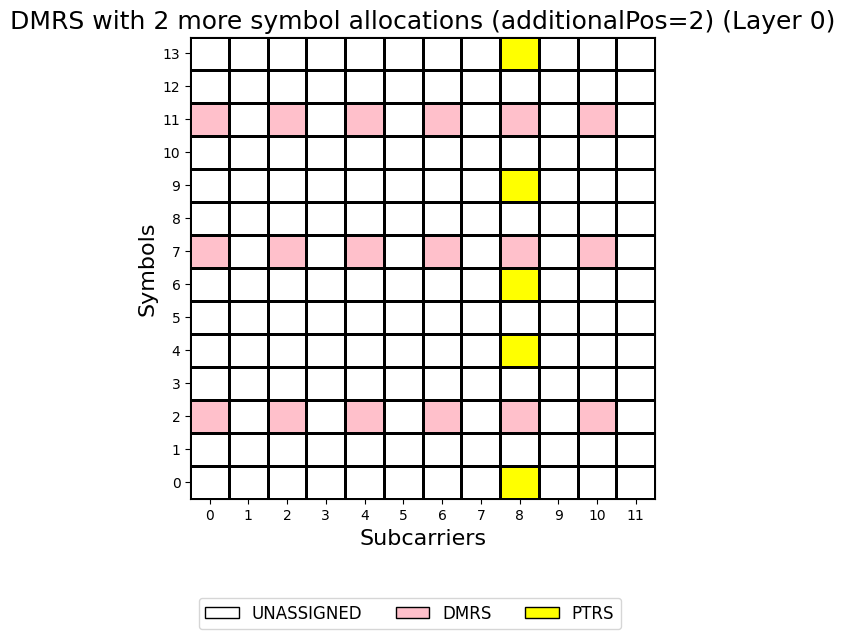

In [7]:
# Using 2 additional symbol positions for DMRS (additionalPos=2) with PTRS reOffset=3 (or '11') which
# means having PTRS at RE index 8 (See "resourceElementOffset" in 3GPP TS 38.211, Table 6.4.1.2.2.1-1).
pdsch.setDMRS(additionalPos=2)
pdsch.setPTRS(timeDensity=2, reOffset=3)
pdsch.getGrid().drawMap(title="DMRS with 2 more symbol allocations (additionalPos=2)")


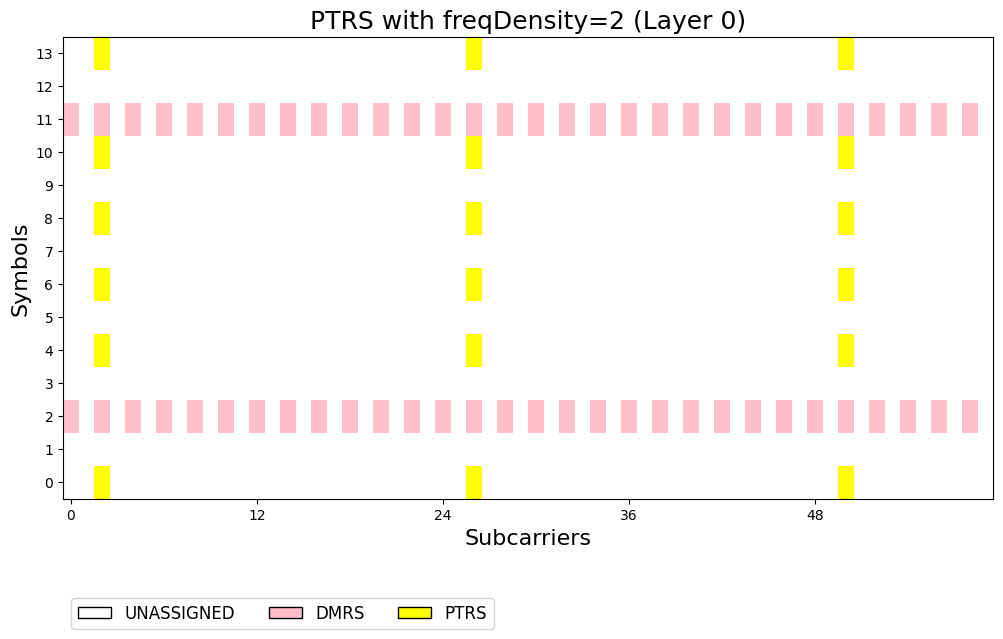

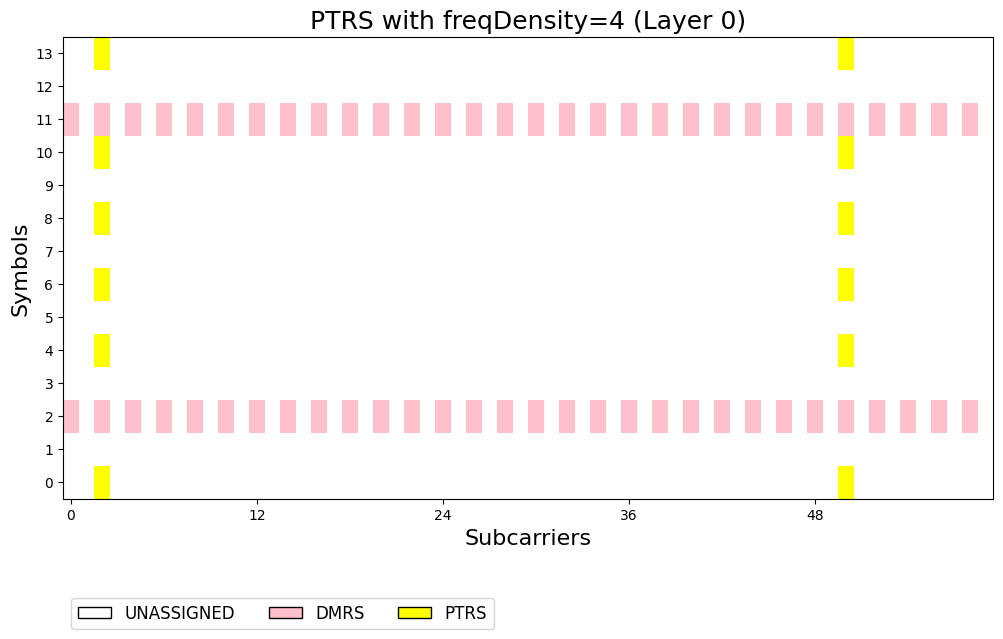

In [8]:
# Comparing freqDensity=2 vs freqDensity=4
# Using 1 additional symbol positions for DMRS (additionalPos=1) with PTRS reOffset=1 (or '01') which
# means having PTRS at RE index 2 (See "resourceElementOffset" in 3GPP TS 38.211, Table 6.4.1.2.2.1-1).
# We do this once with freqDensity=2 (default) and once with freqDensity=4 and compare the map for 
# 5 RBs (60 REs)
pdsch.setDMRS(additionalPos=1)
pdsch.setPTRS(timeDensity=2, freqDensity=2, reOffset=1)  # PTRS in every other RB 
pdsch.getGrid().drawMap(reRange=(0,60), title="PTRS with freqDensity=2")

pdsch.setPTRS(timeDensity=2, freqDensity=4, reOffset=1)  # PTRS in every other 4 RBs 
pdsch.getGrid().drawMap(reRange=(0,60), title="PTRS with freqDensity=4")
